In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np

# 2. Load Dataset
df = pd.read_csv("/content/WeatherEvents_Jan2016-Dec2022.csv")

# 3. Quick Look at Data
print(df.shape)
print(df.info())
print(df.head())

# 4. Drop Columns Not Needed (Optional - based on your use case)
columns_to_drop = ['TimeZone', 'AirportCode', 'ZipCode']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# 5. Handle Missing Values
missing_percent = df.isnull().mean() * 100
print("Missing values (%):\n", missing_percent)

# Drop rows where critical values are missing
df.dropna(subset=['StartTime(UTC)', 'EndTime(UTC)', 'Type', 'Severity'], inplace=True)

# Fill or drop others based on strategy
df['City'].fillna("Unknown", inplace=True)
df['Precipitation(in)'].fillna(0, inplace=True)

# 6. Convert Date Columns to datetime format
df['StartTime(UTC)'] = pd.to_datetime(df['StartTime(UTC)'], errors='coerce')
df['EndTime(UTC)'] = pd.to_datetime(df['EndTime(UTC)'], errors='coerce')

# 7. Remove Outliers in Precipitation
q1 = df['Precipitation(in)'].quantile(0.25)
q3 = df['Precipitation(in)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Precipitation(in)'] >= lower_bound) & (df['Precipitation(in)'] <= upper_bound)]

# 8. Feature Engineering - Add Duration Column
df['Duration (hrs)'] = (df['EndTime(UTC)'] - df['StartTime(UTC)']).dt.total_seconds() / 3600.0

# 9. Standardize Categorical Variables
df['Type'] = df['Type'].str.upper().str.strip()
df['City'] = df['City'].str.title().str.strip()

# 10. Final Check
print(df.describe(include='all'))
print(df.isnull().sum())

# Optional: Save Cleaned Data
df.to_csv("Cleaned_WeatherEvents.csv", index=False)


(101814, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101814 entries, 0 to 101813
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   EventId            101814 non-null  object 
 1   Type               101814 non-null  object 
 2   Severity           101814 non-null  object 
 3   StartTime(UTC)     101814 non-null  object 
 4   EndTime(UTC)       101814 non-null  object 
 5   Precipitation(in)  101814 non-null  float64
 6   TimeZone           101814 non-null  object 
 7   AirportCode        101814 non-null  object 
 8   LocationLat        101814 non-null  float64
 9   LocationLng        101814 non-null  float64
 10  City               101814 non-null  object 
 11  County             101814 non-null  object 
 12  State              101813 non-null  object 
 13  ZipCode            98906 non-null   float64
dtypes: float64(4), object(10)
memory usage: 10.9+ MB
None
  EventId  Type Severity       St

<ipython-input-1-6953e3997325>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].fillna("Unknown", inplace=True)
<ipython-input-1-6953e3997325>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

         EventId   Type Severity                 StartTime(UTC)  \
count      89509  89509    89509                          89509   
unique     89509      7        6                            NaN   
top     W-107246   RAIN    Light                            NaN   
freq           1  49824    59752                            NaN   
mean         NaN    NaN      NaN  2019-06-08 12:42:55.185735424   
min          NaN    NaN      NaN            2016-01-01 05:53:00   
25%          NaN    NaN      NaN            2017-09-20 20:24:00   
50%          NaN    NaN      NaN            2019-05-17 16:53:00   
75%          NaN    NaN      NaN            2021-02-03 06:35:00   
max          NaN    NaN      NaN            2022-12-31 23:15:00   
std          NaN    NaN      NaN                            NaN   

                         EndTime(UTC)  Precipitation(in)   LocationLat  \
count                           89509       89509.000000  89509.000000   
unique                            NaN          

Dataset shape: (89509, 12)

Data Types:
 EventId               object
Type                  object
Severity              object
StartTime(UTC)        object
EndTime(UTC)          object
Precipitation(in)    float64
LocationLat          float64
LocationLng          float64
City                  object
County                object
State                 object
Duration (hrs)       float64
dtype: object

Descriptive Stats:
        Precipitation(in)   LocationLat   LocationLng  Duration (hrs)
count       89509.000000  89509.000000  89509.000000    89509.000000
mean            0.026293     40.286187    -90.449394        1.501877
std             0.046768      4.059244     14.650091       55.201130
min             0.000000     30.537800   -122.863700        0.016667
25%             0.000000     36.042500    -99.338100        0.333333
50%             0.000000     42.270600    -87.904400        0.666667
75%             0.030000     42.955000    -79.101400        1.300000
max             0.200000

<ipython-input-3-226ba6f17c68>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index, palette='Set2')


<Figure size 1200x600 with 0 Axes>

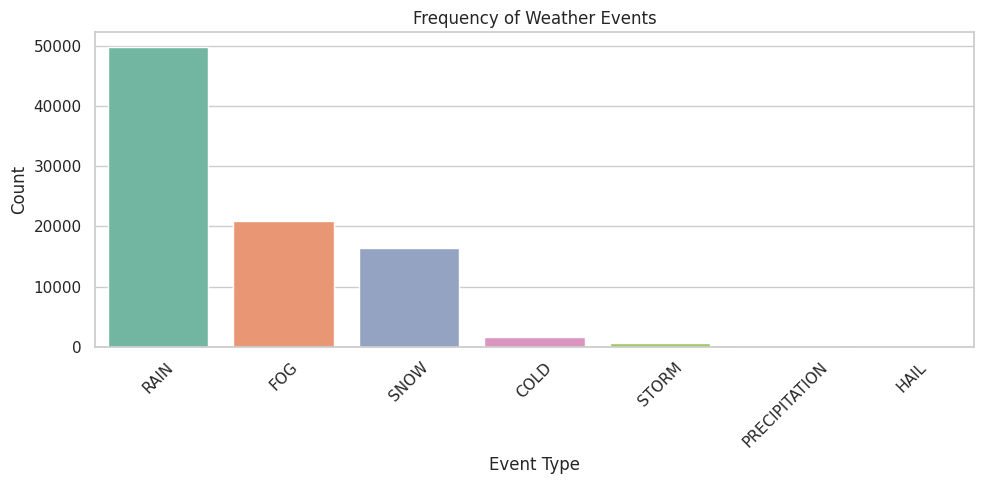

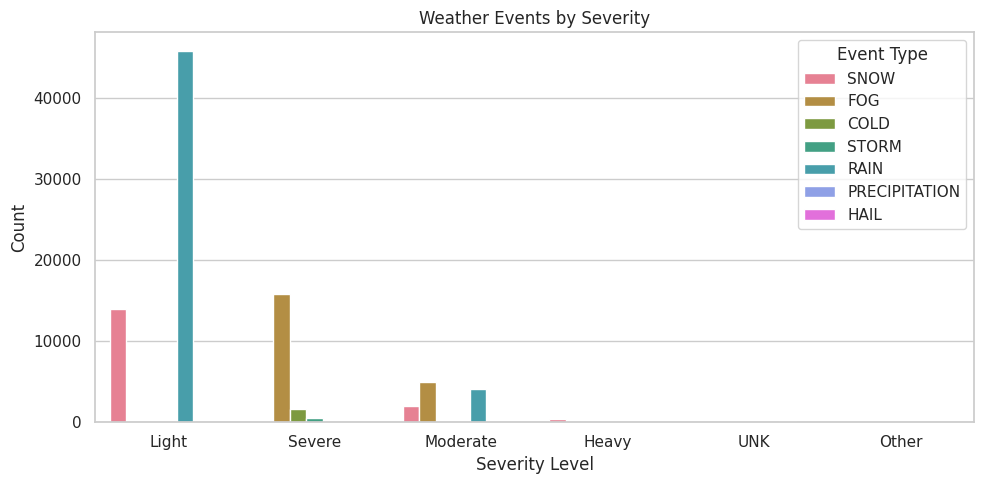

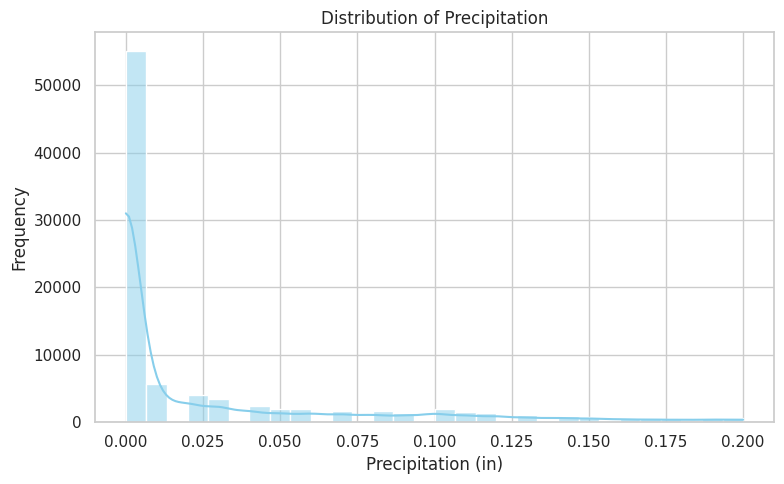

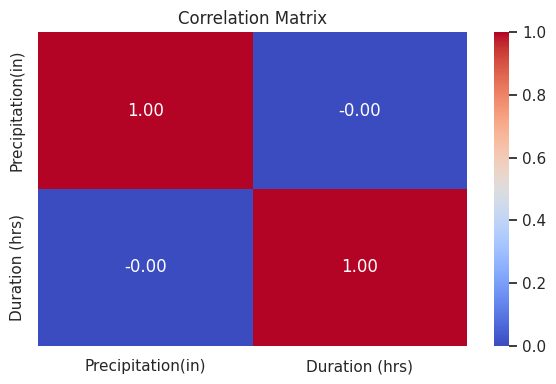

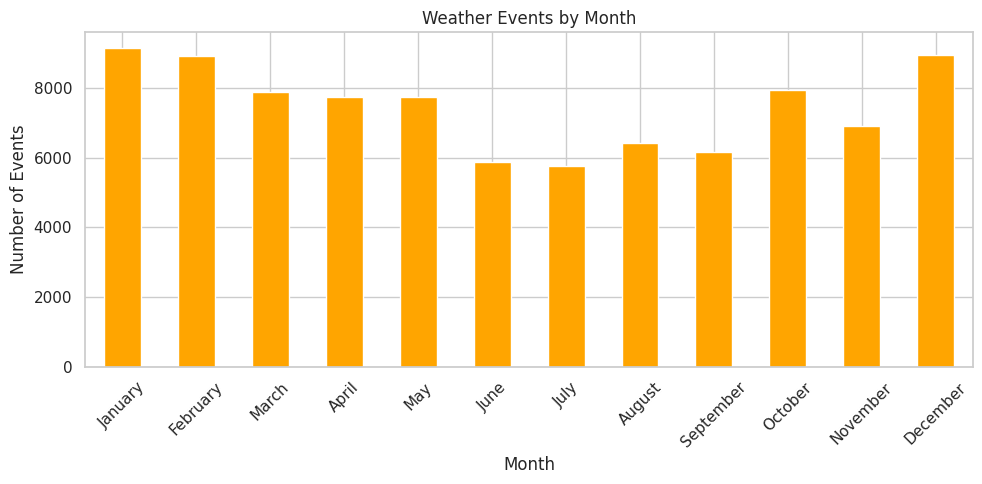

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("Cleaned_WeatherEvents.csv")

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Basic Summary
print("Dataset shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nDescriptive Stats:\n", df.describe())
print("\nEvent Type Counts:\n", df['Type'].value_counts())
print("\nSeverity Counts:\n", df['Severity'].value_counts())

# 2. Frequency of Weather Event Types
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index, palette='Set2')
plt.title('Frequency of Weather Events')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Weather Events by Severity
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Severity', hue='Type', palette='husl')
plt.title('Weather Events by Severity')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

# 4. Precipitation Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Precipitation(in)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation (in)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 5. Correlation Heatmap (Numerical Columns)
numeric_cols = ['Precipitation(in)', 'Duration (hrs)'] # Remove 'Severity'
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 6. Monthly Trend of Weather Events
df['StartTime(UTC)'] = pd.to_datetime(df['StartTime(UTC)'])
df['Month'] = df['StartTime(UTC)'].dt.month_name()

monthly_counts = df['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', color='orange')
plt.title('Weather Events by Month')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


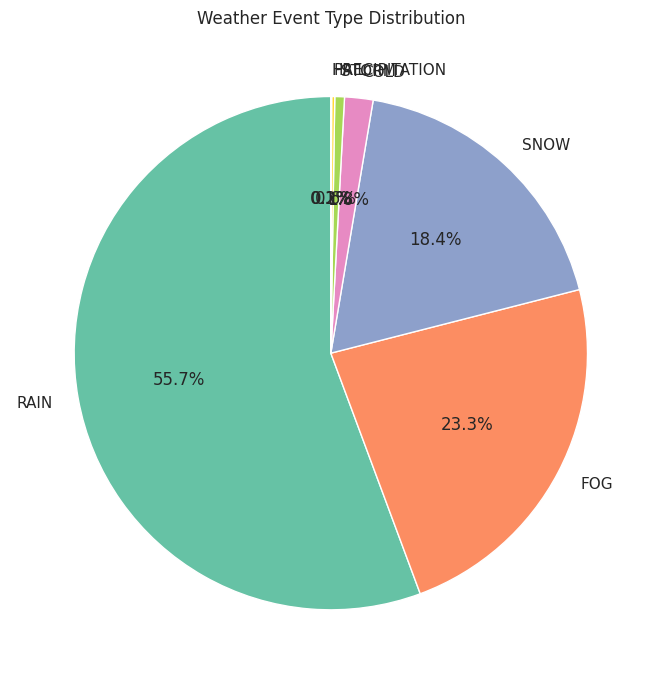

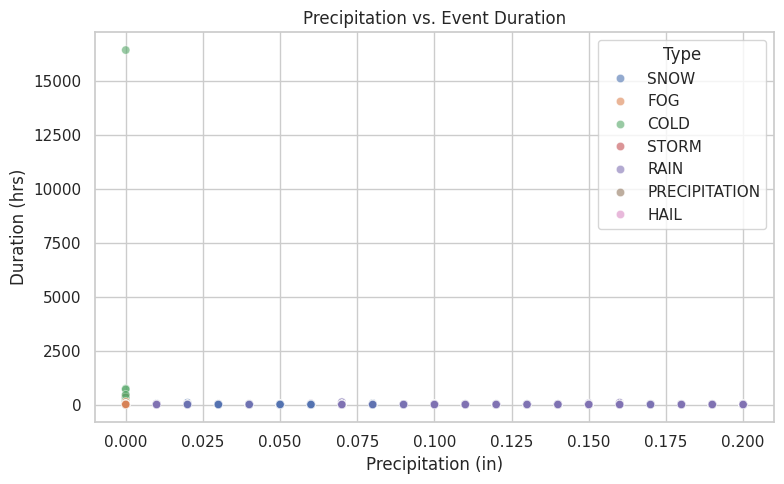

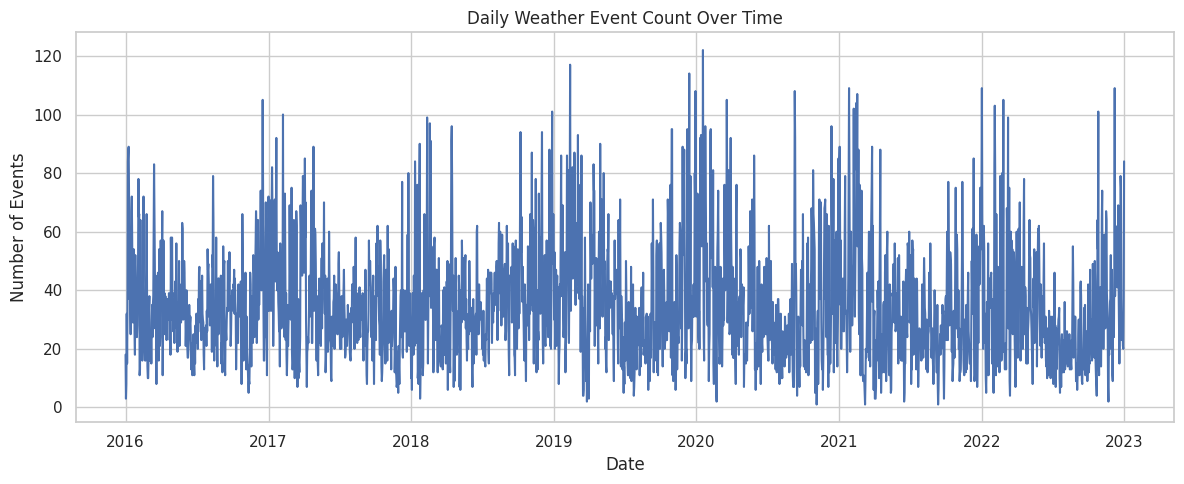

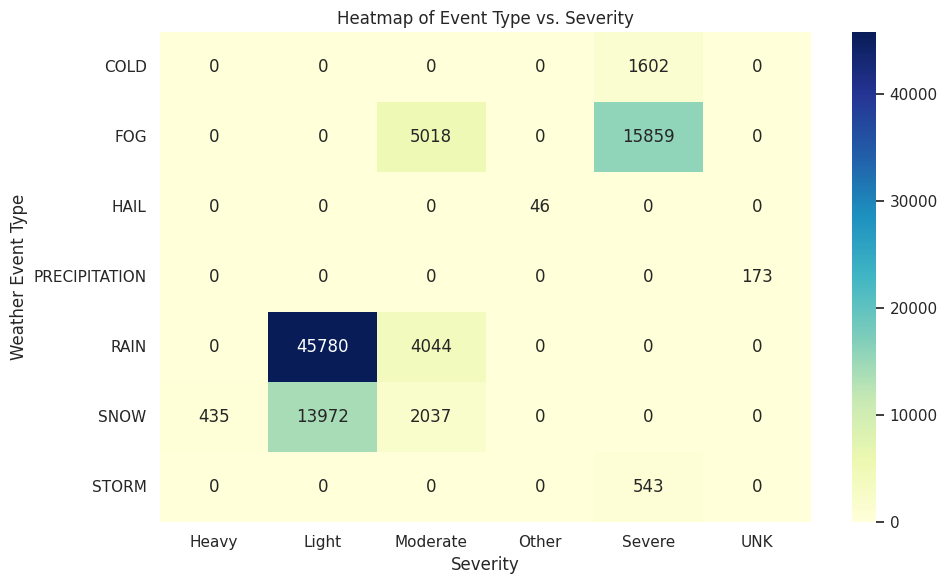

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Load the cleaned dataset
df = pd.read_csv("Cleaned_WeatherEvents.csv")
df['StartTime(UTC)'] = pd.to_datetime(df['StartTime(UTC)'])

# --- 1. Pie Chart: Distribution of Weather Event Types ---
plt.figure(figsize=(7, 7))
df['Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Weather Event Type Distribution")
plt.ylabel('')
plt.tight_layout()
plt.show()

# --- 2. Scatter Plot: Precipitation vs. Duration ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Precipitation(in)', y='Duration (hrs)', data=df, hue='Type', alpha=0.6)
plt.title("Precipitation vs. Event Duration")
plt.xlabel("Precipitation (in)")
plt.ylabel("Duration (hrs)")
plt.tight_layout()
plt.show()

# --- 3. Time Series Plot: Events Over Time ---
df['Date'] = df['StartTime(UTC)'].dt.date
daily_events = df.groupby('Date').size()

plt.figure(figsize=(12, 5))
daily_events.plot()
plt.title("Daily Weather Event Count Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Events")
plt.tight_layout()
plt.show()

# --- 4. Heatmap: Event Type vs. Severity ---
heatmap_data = df.groupby(['Type', 'Severity']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap of Event Type vs. Severity")
plt.xlabel("Severity")
plt.ylabel("Weather Event Type")
plt.tight_layout()
plt.show()

# --- 5. Bonus: Geographical Mapping of Events (Using Plotly) ---
fig = px.scatter_mapbox(df.head(1000),
                        lat="LocationLat", lon="LocationLng",  # Changed column names
                        color="Type",
                        hover_data=["City", "State", "Severity"],
                        zoom=3, height=500)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title_text="Weather Events Map (Sample of 1000 Events)")
fig.show()
